In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [69]:
class Agent (object):
    def __init__(self, unique_id, i_wealth, N, debt):
        self.id = unique_id
        self.wealth = i_wealth
        self.N = N
        self.other_agents = self.OtherAgents()
        self.debt = debt
        
    def OtherAgents (self):
        lst = []
        for i in range(self.N):
            if self.id != i:
                lst.append(i)
        return lst
    
    def GiveMoney(self):
        # Select agent to give money
        agent2give = np.random.choice(self.other_agents)
        if self.wealth == 0 and self.debt == 'no':
            amount = 0
        else:
            amount = 1
        self.wealth = self.wealth - amount
        return agent2give, amount
    
    def Receive (self):
        self.wealth = self.wealth + 1
        

In [70]:
# Creating agents

# Defining parameters
N = 10
wealth = 1
agents = []
debt = 'no' # valid choices: 'yes', 'no'

for i in range(N):
    unique_id = i
    agents.append(Agent(unique_id, wealth, N, debt))

# Starting game
run_data = np.arange(N)
runs = 500
steps = 100
for k in range(runs):
    for i in range(steps):
        # Initialize agents Rrandomly
        np.random.shuffle(agents)

        # Tick
        for agent in agents:
            receiver, amount = agent.GiveMoney()
            if amount !=0:
                agents[receiver].Receive()

    # Data collection
    data = np.zeros((N,2))
    for i in range(len(agents)):
        data[i,0] = agents[i].id
        data[i,1] = agents[i].wealth

    # Sort array
    d = data[data[:,0].argsort()][:,1]
    run_data = np.vstack((run_data, d))

In [71]:
# x = range(N)
# plt.bar(data[:,0], data[:,1])
# plt.xlabel('Agents id')
# plt.ylabel('Whealth')
# plt.title('Random Wealth Game')
# plt.grid(True)
# plt.show()

In [72]:
df = pd.DataFrame(data=run_data[1:,:])
# df.head()

In [73]:
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.000000,1.100000,1.014000,1.046000,0.958000,1.036000,1.002000,0.932000,0.970000,0.942000
std,1.143072,1.203702,1.210262,1.219368,1.189566,1.249731,1.169929,1.125126,1.166113,1.171914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.250000,1.000000
max,7.000000,6.000000,9.000000,7.000000,7.000000,7.000000,7.000000,6.000000,6.000000,7.000000


In [74]:
mean_data = np.zeros((N,2))
for j in range(N):
    mean_data[j,0] = j
    mean_data[j,1] = df.mean(0)[j]
mean_data

array([[ 0.   ,  1.   ],
       [ 1.   ,  1.1  ],
       [ 2.   ,  1.014],
       [ 3.   ,  1.046],
       [ 4.   ,  0.958],
       [ 5.   ,  1.036],
       [ 6.   ,  1.002],
       [ 7.   ,  0.932],
       [ 8.   ,  0.97 ],
       [ 9.   ,  0.942]])

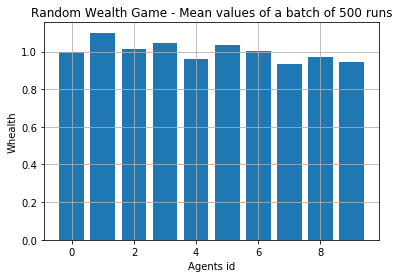

In [75]:
x = range(N)
plt.bar(mean_data[:,0], mean_data[:,1])
plt.xlabel('Agents id')
plt.ylabel('Whealth')
plt.title('Random Wealth Game - Mean values of a batch of ' + str(runs) + ' runs')
plt.grid(True)
plt.show()